In [1]:
# importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# code to display rows and columns

In [3]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}
</style>

In [4]:
# Code to display all the columns in the dataset
pd.set_option('display.max_columns', None)

In [5]:
import warnings
warnings.filterwarnings('ignore')

# importing dataset

In [6]:
df = pd.read_csv("train.csv")

In [7]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
# Column Description

In [9]:
#survival - Survival (0 = No; 1 = Yes)
#class - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
#name - Name
#sex - Sex
#age - Age
#sibsp - Number of Siblings/Spouses Aboard
#parch - Number of Parents/Children Aboard
#ticket - Ticket Number
#fare - Passenger Fare
#cabin - Cabin
#embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

# Problem Type

In [10]:
# Checking the data types
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [11]:
# Data types include int,object and float

In [12]:
# using Describe to get an overview of data
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [13]:
# There were a total of 891 people travelling according to the dataset

# The age range describes the age range of infants to the max age of 80

# Maximum people were travelling in 3rd class 

In [14]:
# Lets check the passanger with the highest age

# Mr. Algernon Henry Wilson was the oldest passenger on the ship 
df[df["Age"] == 80.0000]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0,A23,S


In [15]:
# Lets check the passangers with the most expensive ticket fare

# Highest ticket rate was upto 512$ which is very high for that time

df[df["Fare"] == 512.3292]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


In [16]:
#Lets check for duplicate values
df.duplicated().sum()

0

In [17]:
# No duplicate values

In [18]:
# Lets check for missing values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [19]:
# Age has 177 missing values
# Cabin has 687 missing values
# Embarked has 2 missing values

<AxesSubplot:>

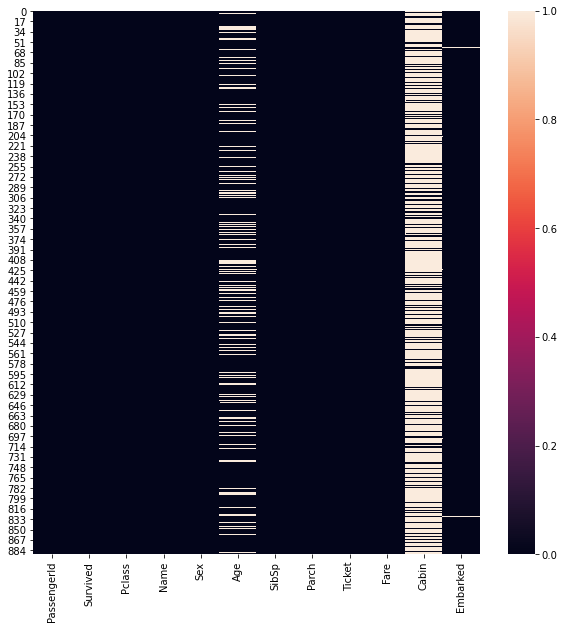

In [20]:
# Visualizing the missing values
plt.figure(figsize=(10,10))
sns.heatmap(df.isnull())

In [21]:
# Checking shape of data
df.shape

(891, 12)

In [22]:
# 891 rows
# 12 columns

# EDA

In [23]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [24]:
sns.set_theme(style="darkgrid")

In [25]:
# Univariat Analysis

0    549
1    342
Name: Survived, dtype: int64

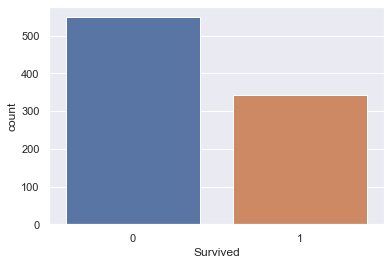

In [26]:
sns.countplot(x="Survived",data=df)
df["Survived"].value_counts()

In [27]:
# We can observe that most of the people didn't survive

# A total of 324 survivers 

# 594 people could not make it 

3    491
1    216
2    184
Name: Pclass, dtype: int64

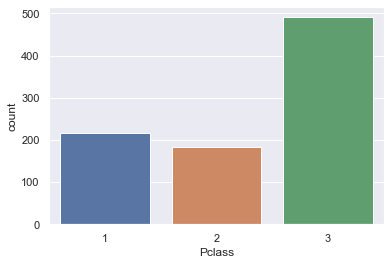

In [28]:
sns.countplot(x="Pclass",data=df)
df["Pclass"].value_counts()

In [29]:
# Most of the passengers travelling were in third class

# 2nd class had the least amount of people travelling

# There were a total of 216 people travelling in first class

male      577
female    314
Name: Sex, dtype: int64

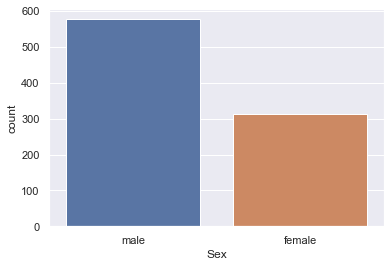

In [30]:
sns.countplot(x="Sex",data=df)
df["Sex"].value_counts()

In [31]:
# More male passengers travelling than female

# Female count on the ship was 314

# there were a total 577 males travelling

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

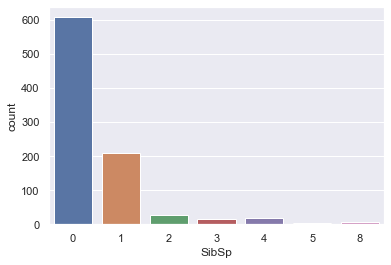

In [32]:
sns.countplot(x="SibSp",data=df)
df["SibSp"].value_counts()

In [33]:
# Most of the passengers were not travelling with Sib/Spo 

# So we can say that most of the people travelling were not married

# There were also some people with upto 8 sibling/spouses

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

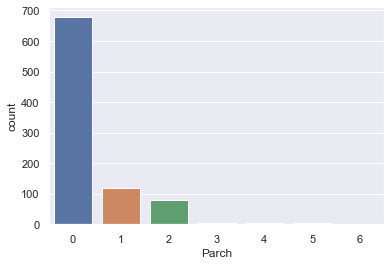

In [34]:
sns.countplot(x="Parch",data=df)
df["Parch"].value_counts()

In [35]:
# Most of the passengers were not travelling with Parent/Children

# Most of the people who boarded on Titanic were single(unmarried)

In [36]:
# Checking out the dataframe columns 

df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

S    644
C    168
Q     77
Name: Embarked, dtype: int64

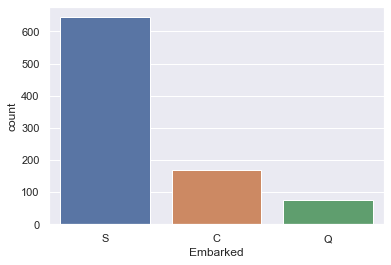

In [37]:
sns.countplot(x="Embarked",data=df)
df["Embarked"].value_counts()

In [38]:
# Most of the people boarded from Southampton

# Cherbourg city had the second most people who borded on the ship total 168

# A total of 77 passengers from Queenstown

array([[<AxesSubplot:title={'center':'PassengerId'}>,
        <AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Pclass'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SibSp'}>,
        <AxesSubplot:title={'center':'Parch'}>],
       [<AxesSubplot:title={'center':'Fare'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

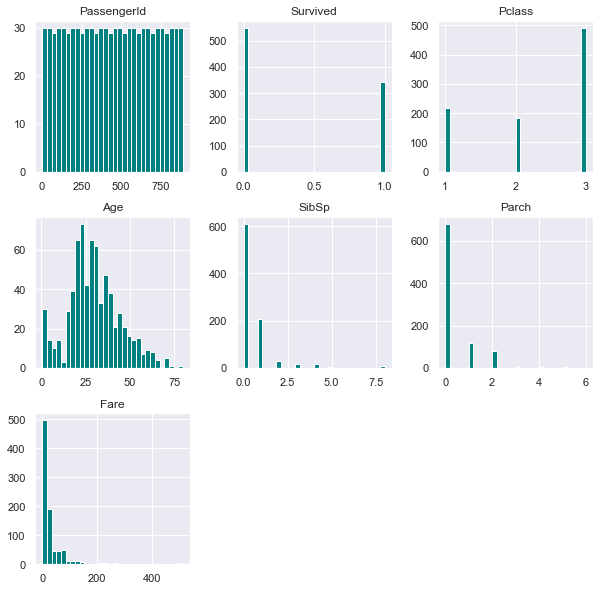

In [39]:
df.hist(bins=30,figsize=(10,10),color="teal")

In [40]:
# Some Conclusions from the above hist plots
# Less people survived more people died

# most people were travelling in third class

# Max people with a age range between (25,40)

# Most people who died were fro third class 

<AxesSubplot:xlabel='Pclass', ylabel='count'>

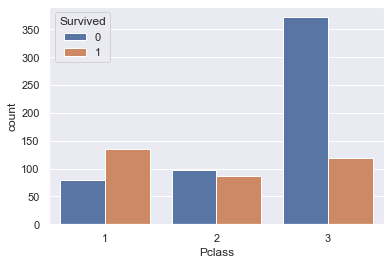

In [41]:
sns.countplot(x="Pclass",hue="Survived",data=df)

In [42]:
# Highest survival rate for the passengers from 1st class as expected

# Most of the survivers were females

# lowest survivers were men

# A better survival rate in 3rd class as compared to 2nd class as there were more passengers in 3rd class

<AxesSubplot:xlabel='Sex', ylabel='count'>

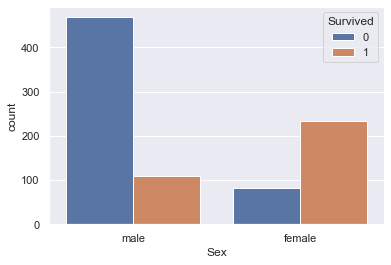

In [43]:
sns.countplot(x="Sex",hue="Survived",data=df)

In [44]:
# There were higher female survivers than male

<AxesSubplot:xlabel='SibSp', ylabel='count'>

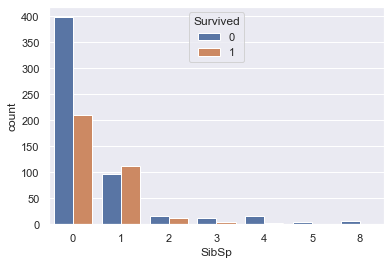

In [45]:
sns.countplot(x="SibSp",hue="Survived",data=df)

In [46]:
# Most people with no sibling or spouse survived

# Most of the single men/women survived

<AxesSubplot:xlabel='Parch', ylabel='count'>

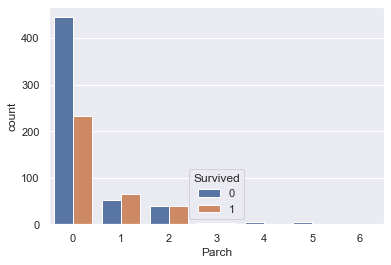

In [47]:
sns.countplot(x="Parch",hue="Survived",data=df)

In [48]:
# Most people with no parent and children survived 

<AxesSubplot:xlabel='Embarked', ylabel='count'>

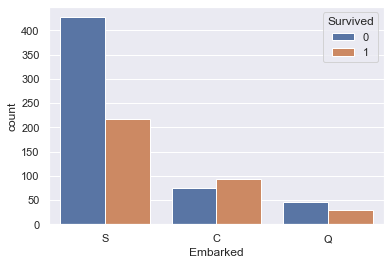

In [49]:
sns.countplot(x="Embarked",hue="Survived",data=df)

In [50]:
# Most survivals were the people who borded from southampton

# very less survival rate for people who boarded from Queenstown

# Cherbourg has a decent survival rate

# Most survivers from southampton as more people boarded from southhampton

In [51]:
# Bivariate Analysis 

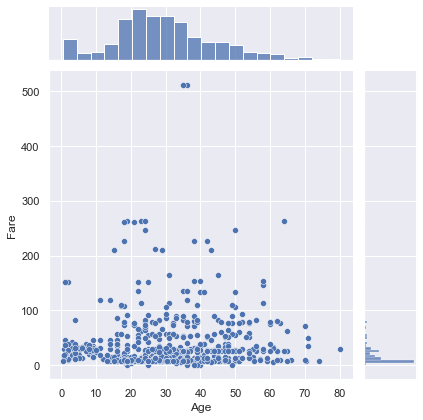

In [52]:
sns.jointplot(x="Age",y="Fare",data=df)

In [53]:
# As expected more the age there is a possibility of higher fare

# We can asume that people with higher age can have a stable income so they can afford either middle class or first class


# Data Cleaning

In [54]:
# Missing values

In [55]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [56]:
# Age has a lot of missing values
# Lets replace the age with mean values

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

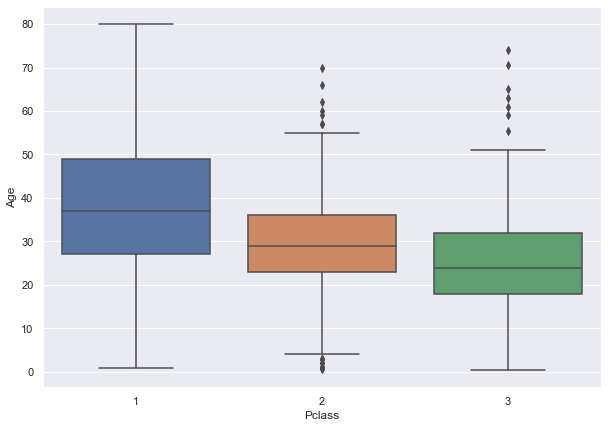

In [57]:
plt.figure(figsize=(10,7))

sns.boxplot(x='Pclass',y='Age',data=df)

In [58]:
# Creating a function to replace missing values in age
def impute_age(cols):
    
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    
    else:
        return Age

In [59]:
df['Age'] = df[['Age','Pclass']].apply(impute_age,axis=1)

<AxesSubplot:>

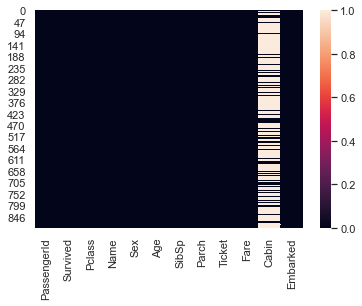

In [60]:
# we have replaced the missing age values with mean
sns.heatmap(df.isnull())


In [61]:
# Lets drop the cabin column as it has too many missing values

In [62]:
df = df.drop("Cabin",axis=1)

In [63]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<AxesSubplot:>

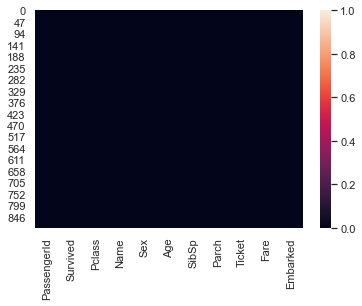

In [64]:
sns.heatmap(df.isnull())

In [65]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [66]:
df["Embarked"].value_counts() 

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [67]:
# Embarked has only 2 missing values lets drop them
df.dropna(inplace=True)

In [68]:
# No more missing values
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [69]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [70]:
# Lets Drop the Name,Ticket and PassengerId

In [71]:
df = df.drop(["PassengerId","Name","Ticket"],axis=1)

In [72]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


# Encoding

In [73]:
# Using pandas get dummies
df = pd.get_dummies(df,drop_first=True)

In [74]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [75]:
# Outlier checking

In [76]:
df.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male',
       'Embarked_Q', 'Embarked_S'],
      dtype='object')

<AxesSubplot:>

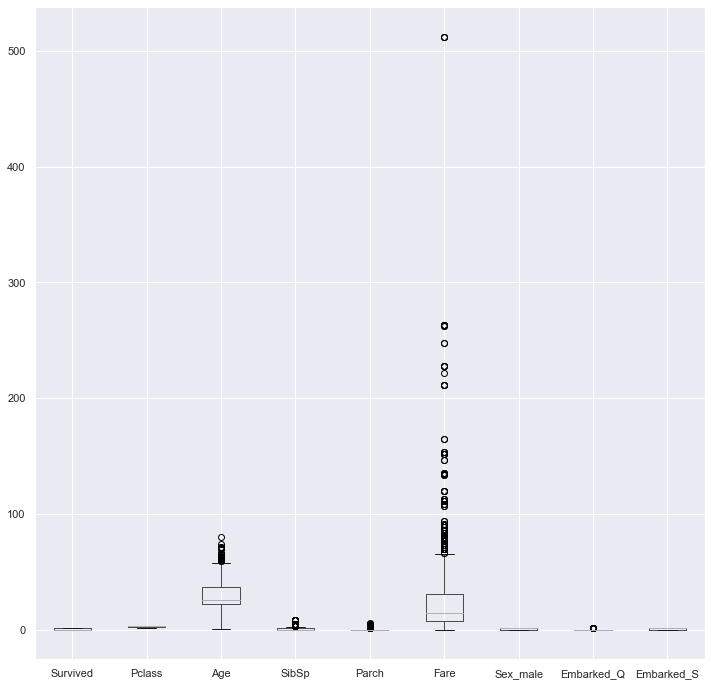

In [77]:
plt.figure(figsize=(12,12))
df.boxplot()

In [78]:
# Age and Fare have some outliers

In [79]:
from scipy import stats

In [80]:
# creating function to count outliers
def outliers(cname):
    Q1 = df[cname].quantile(0.25)
    Q3 = df[cname].quantile(0.75)
    IQR = stats.iqr(df[cname])
    print('The first quartile :',Q1,'for',cname)
    print('The third quartile :',Q3,'for',cname)
    print('The IQR :', IQR,'for',cname)
    
    L_outlier = Q1 - 1.5*(Q3 - Q1)  
    U_outlier = Q3 + 1.5*(Q3 - Q1)

    print('The left outlier :',L_outlier,'for',cname)
    print('The Right outlier :',U_outlier,'for',cname)
    
    print("Left Outliers :",df[df[cname] < L_outlier][cname].count())
    print("Right Outliers :",df[df[cname] > U_outlier][cname].count())

In [81]:
# Outliers in Age
outliers("Age")

The first quartile : 22.0 for Age
The third quartile : 36.5 for Age
The IQR : 14.5 for Age
The left outlier : 0.25 for Age
The Right outlier : 58.25 for Age
Left Outliers : 0
Right Outliers : 27


In [82]:
# Outliers in Fare
outliers("Fare")

The first quartile : 7.8958 for Fare
The third quartile : 31.0 for Fare
The IQR : 23.1042 for Fare
The left outlier : -26.7605 for Fare
The Right outlier : 65.6563 for Fare
Left Outliers : 0
Right Outliers : 114


In [83]:
# Checking Correlation 

In [84]:
cor = df.corr()

<AxesSubplot:>

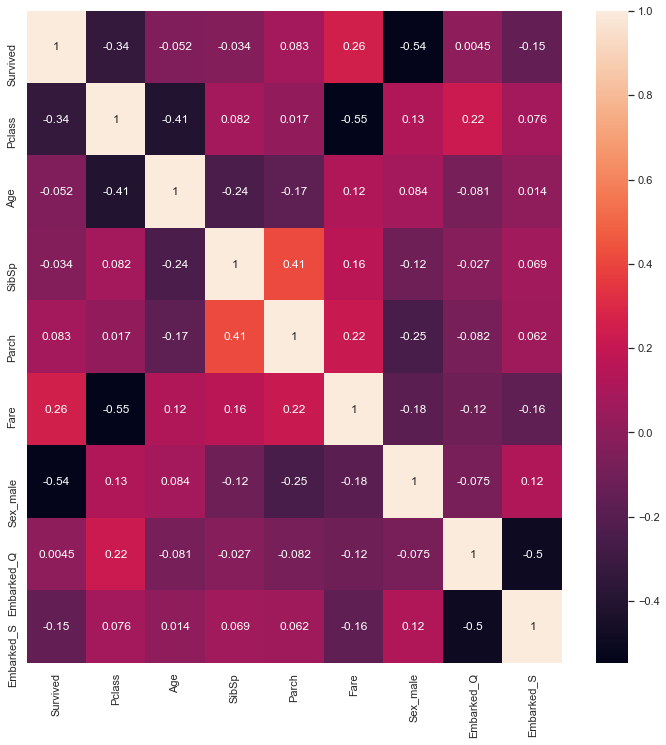

In [85]:
plt.figure(figsize=(12,12))
sns.heatmap(data=cor,annot=True)

In [86]:
plt.figure(figsize=(22,7))


<Figure size 1584x504 with 0 Axes>

<Figure size 1584x504 with 0 Axes>

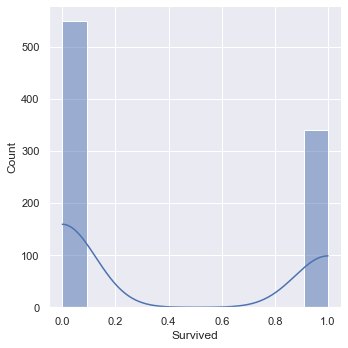

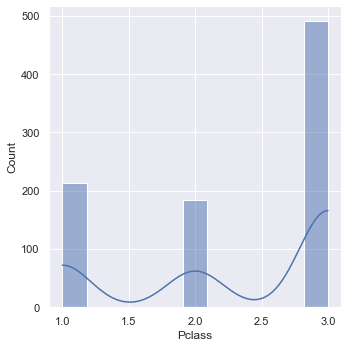

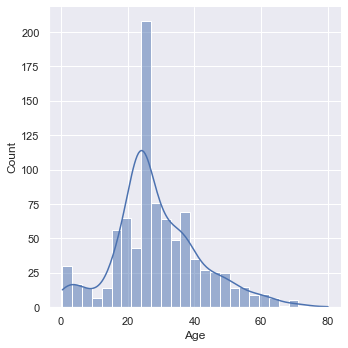

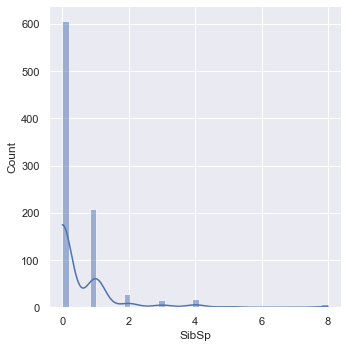

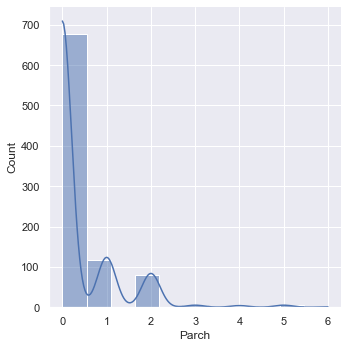

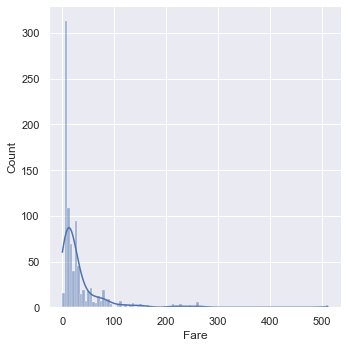

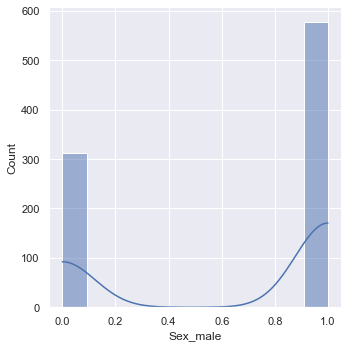

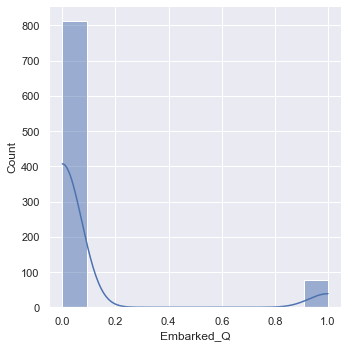

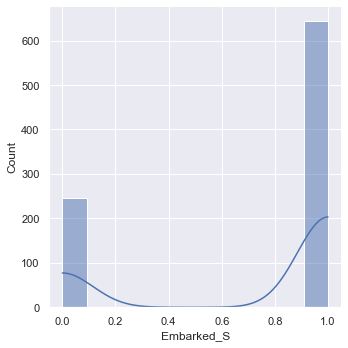

In [87]:
# Checking Displots

for i in df.columns:
    
    sns.displot(df[i],kde=True)

In [88]:
# Checking Skewness
df.skew()

Survived      0.484568
Pclass       -0.636998
Age           0.546718
SibSp         3.691058
Parch         2.745160
Fare          4.801440
Sex_male     -0.625625
Embarked_Q    2.944406
Embarked_S   -1.006192
dtype: float64

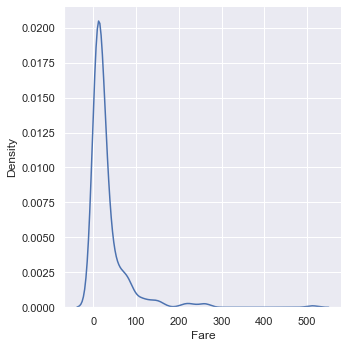

In [89]:
sns.displot(df["Fare"],kind="kde")

In [90]:
df["Fare"].describe().transpose()

count    889.000000
mean      32.096681
std       49.697504
min        0.000000
25%        7.895800
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

<AxesSubplot:xlabel='Fare'>

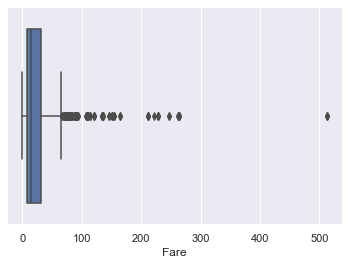

In [91]:
sns.boxplot(x="Fare",data=df)

In [92]:
df.skew()

Survived      0.484568
Pclass       -0.636998
Age           0.546718
SibSp         3.691058
Parch         2.745160
Fare          4.801440
Sex_male     -0.625625
Embarked_Q    2.944406
Embarked_S   -1.006192
dtype: float64

In [93]:
# Reducing skewness in fare
from scipy.special import boxcox1p

In [94]:
df['Fare'] = boxcox1p(df['Fare'],0)

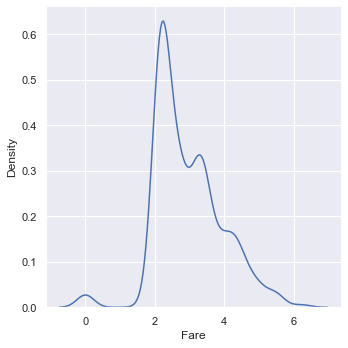

In [95]:
# The plot looks more normal now
sns.displot(df["Fare"],kind="kde")

In [96]:
df.skew()

Survived      0.484568
Pclass       -0.636998
Age           0.546718
SibSp         3.691058
Parch         2.745160
Fare          0.400109
Sex_male     -0.625625
Embarked_Q    2.944406
Embarked_S   -1.006192
dtype: float64

# Splitting the data

In [97]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,2.110213,1,0,1
1,1,1,38.0,1,0,4.280593,0,0,0
2,1,3,26.0,0,0,2.188856,0,0,1
3,1,1,35.0,1,0,3.990834,0,0,1
4,0,3,35.0,0,0,2.202765,1,0,1


In [98]:
df["Survived"].value_counts()

0    549
1    340
Name: Survived, dtype: int64

In [99]:
from sklearn.model_selection import train_test_split

In [100]:
X = df.drop("Survived",axis=1)
y = df["Survived"]

In [101]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,22.0,1,0,2.110213,1,0,1
1,1,38.0,1,0,4.280593,0,0,0
2,3,26.0,0,0,2.188856,0,0,1
3,1,35.0,1,0,3.990834,0,0,1
4,3,35.0,0,0,2.202765,1,0,1


In [102]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [103]:
X = X.values
y = y.values

In [104]:
X

array([[ 3., 22.,  1., ...,  1.,  0.,  1.],
       [ 1., 38.,  1., ...,  0.,  0.,  0.],
       [ 3., 26.,  0., ...,  0.,  0.,  1.],
       ...,
       [ 3., 24.,  1., ...,  0.,  0.,  1.],
       [ 1., 26.,  0., ...,  1.,  0.,  0.],
       [ 3., 32.,  0., ...,  1.,  1.,  0.]])

In [105]:
y

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [107]:
X_train.shape

(666, 8)

In [108]:
X_test.shape

(223, 8)

# Scaling

In [109]:
from sklearn.preprocessing import MinMaxScaler

In [110]:
minni = MinMaxScaler()

In [111]:
X_train = minni.fit_transform(X_train)
X_test = minni.transform(X_test)

# Machine Learning

# Logistic Regression

In [112]:
from sklearn.linear_model import LogisticRegression

In [113]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

# Best Random State --> 66 found using for loop

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=24, random_state=66)
mod_1 = LogisticRegression()
mod_1.fit(X_train,y_train)
train_score_1 = mod_1.score(X_train,y_train)
pred_1 = mod_1.predict(X_test)
test_score_1 = accuracy_score(y_test,pred_1)
    
print("The training accuracy is :",train_score_1)
print("The testing accuracy is :",test_score_1)


The training accuracy is : 0.8
The testing accuracy is : 0.7916666666666666


In [115]:
print(confusion_matrix(y_test,pred_1))
print("\n")
print(classification_report(y_test,pred_1))
print("\n")

[[ 9  2]
 [ 3 10]]


              precision    recall  f1-score   support

           0       0.75      0.82      0.78        11
           1       0.83      0.77      0.80        13

    accuracy                           0.79        24
   macro avg       0.79      0.79      0.79        24
weighted avg       0.80      0.79      0.79        24





# Stratified Validation on Logistic regression

In [116]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

In [117]:
kfold = StratifiedKFold(n_splits=10,random_state=24)

K_results = cross_val_score(mod_1,X,y,cv=kfold)

kfold_accuracy_LR = np.mean(abs(K_results))

In [118]:
kfold_accuracy_LR

0.7964249233912155

In [119]:
K_results

array([0.78651685, 0.79775281, 0.76404494, 0.84269663, 0.80898876,
       0.78651685, 0.78651685, 0.78651685, 0.78651685, 0.81818182])

In [120]:
score = {"Algorithm":["Logistic Regression"],
         "Training_Acc":[train_score_1],
        "Accuracy":[test_score_1],
        "Cross_validation":[kfold_accuracy_LR]}

final_card = pd.DataFrame(score)

In [121]:
final_card

,Algorithm,Training_Acc,Accuracy,Cross_validation
0,Logistic Regression,0.8,0.791667,0.796425


# Naive Bayes

In [122]:
from sklearn.naive_bayes import GaussianNB

# Best RS --> 4 found using for loop

In [123]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=33, random_state=4)
    
mod_2 = GaussianNB()
mod_2.fit(X_train,y_train)
train_score_2 = mod_2.score(X_train,y_train)
pred_2 = mod_2.predict(X_test)
test_score_2 = accuracy_score(y_test,pred_2)
    
print("The training accuracy is :",train_score_2)
print("The testing accuracy is :",test_score_2)

The training accuracy is : 0.7663551401869159
The testing accuracy is : 0.7575757575757576


In [124]:
print(confusion_matrix(y_test,pred_2))
print("\n")
print(classification_report(y_test,pred_2))
print("\n")

[[14  3]
 [ 5 11]]


              precision    recall  f1-score   support

           0       0.74      0.82      0.78        17
           1       0.79      0.69      0.73        16

    accuracy                           0.76        33
   macro avg       0.76      0.76      0.76        33
weighted avg       0.76      0.76      0.76        33





# Stratified Cross Validation Naive Bayes

In [125]:
kfold = StratifiedKFold(n_splits=10,random_state=24)

K_results = cross_val_score(mod_2,X,y,cv=kfold)

kfold_accuracy_NB = np.mean(abs(K_results))

In [126]:
kfold_accuracy_NB

0.7694586312563841

In [127]:
K_results

array([0.74157303, 0.73033708, 0.76404494, 0.74157303, 0.78651685,
       0.75280899, 0.7752809 , 0.80898876, 0.7752809 , 0.81818182])

In [128]:
score = {"Algorithm":["Logistic Regression","Naive Bayes"],
         "Training_Acc":[train_score_1,train_score_2],
        "Accuracy":[test_score_1,test_score_2],
        "Cross_validation":[kfold_accuracy_LR,kfold_accuracy_NB]}

final_card = pd.DataFrame(score)

In [129]:
final_card

,Algorithm,Training_Acc,Accuracy,Cross_validation
0,Logistic Regression,0.800000,0.791667,0.796425
1,Naive Bayes,0.766355,0.757576,0.769459


# Random_forest_classification

In [130]:
from sklearn.ensemble import RandomForestClassifier

# Using for loop the best random state --> 15

In [131]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=24, random_state=15)
    
mod_3 = RandomForestClassifier()
mod_3.fit(X_train,y_train)
train_score_3 = mod_3.score(X_train,y_train)
pred_3 = mod_3.predict(X_test)
test_score_3 = accuracy_score(y_test,pred_3)
    
print("The training accuracy is :",train_score_3)
print("The testing accuracy is :",test_score_3)
print("\n")

The training accuracy is : 0.9815028901734104
The testing accuracy is : 0.9166666666666666




In [132]:
print(confusion_matrix(y_test,pred_3))
print("\n")
print(classification_report(y_test,pred_3))
print("\n")

[[17  1]
 [ 1  5]]


              precision    recall  f1-score   support

           0       0.94      0.94      0.94        18
           1       0.83      0.83      0.83         6

    accuracy                           0.92        24
   macro avg       0.89      0.89      0.89        24
weighted avg       0.92      0.92      0.92        24





# Cross Validation 

In [133]:
kfold = StratifiedKFold(n_splits=10,random_state=24)

K_results = cross_val_score(mod_3,X,y,cv=kfold)

kfold_accuracy_RFR = np.mean(abs(K_results))

In [134]:
kfold_accuracy_RFR

0.8099591419816139

In [135]:
K_results

array([0.74157303, 0.80898876, 0.75280899, 0.83146067, 0.87640449,
       0.82022472, 0.80898876, 0.76404494, 0.83146067, 0.86363636])

In [136]:
score = {"Algorithm":["Logistic Regression","Naive Bayes","Random Forest Classi"],
         "Training_Acc":[train_score_1,train_score_2,train_score_3],
        "Accuracy":[test_score_1,test_score_2,test_score_3],
        "Cross_validation":[kfold_accuracy_LR,kfold_accuracy_NB,
                           kfold_accuracy_RFR]}

final_card = pd.DataFrame(score)

In [137]:
final_card

,Algorithm,Training_Acc,Accuracy,Cross_validation
0,Logistic Regression,0.800000,0.791667,0.796425
1,Naive Bayes,0.766355,0.757576,0.769459
2,Random Forest Classi,0.981503,0.916667,0.809959


# Decision Tree

In [138]:
from sklearn.tree import DecisionTreeClassifier

# Best Random state --> 15 found using for loop

In [139]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=24, random_state=15)
    
mod_4 = DecisionTreeClassifier()
mod_4.fit(X_train,y_train)
train_score_4 = mod_4.score(X_train,y_train)
pred_4 = mod_4.predict(X_test)
test_score_4 = accuracy_score(y_test,pred_4)
    
print("The training accuracy is :",train_score_4)
print("The testing accuracy is :",test_score_4)
print("\n")

The training accuracy is : 0.9815028901734104
The testing accuracy is : 0.9583333333333334




In [140]:
print(confusion_matrix(y_test,pred_4))
print("\n")
print(classification_report(y_test,pred_4))
print("\n")

[[18  0]
 [ 1  5]]


              precision    recall  f1-score   support

           0       0.95      1.00      0.97        18
           1       1.00      0.83      0.91         6

    accuracy                           0.96        24
   macro avg       0.97      0.92      0.94        24
weighted avg       0.96      0.96      0.96        24





# Cross validation

In [141]:
kfold = StratifiedKFold(n_splits=10,random_state=24)

K_results = cross_val_score(mod_4,X,y,cv=kfold)

kfold_accuracy_DT = np.mean(abs(K_results))

In [142]:
kfold_accuracy_DT

0.7761746680286006

In [143]:
score = {"Algorithm":["Logistic Regression","Naive Bayes","Random Forest Classi",
                     "Decision Tree"],
         "Training_Acc":[train_score_1,train_score_2,train_score_3,
                        train_score_4],
        "Accuracy":[test_score_1,test_score_2,test_score_3,
                   test_score_4],
        "Cross_validation":[kfold_accuracy_LR,kfold_accuracy_NB,
                           kfold_accuracy_RFR,kfold_accuracy_DT]}

final_card = pd.DataFrame(score)

In [144]:
final_card

,Algorithm,Training_Acc,Accuracy,Cross_validation
0,Logistic Regression,0.800000,0.791667,0.796425
1,Naive Bayes,0.766355,0.757576,0.769459
2,Random Forest Classi,0.981503,0.916667,0.809959
3,Decision Tree,0.981503,0.958333,0.776175


# Support Vector Machine

In [145]:
from sklearn.svm import SVC

# Best Random state --> 40 found using for loop

In [146]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=24, random_state=40)
    
mod_5 = GaussianNB()
mod_5.fit(X_train,y_train)
train_score_5 = mod_5.score(X_train,y_train)
pred_5 = mod_5.predict(X_test)
test_score_5 = accuracy_score(y_test,pred_5)
    
print("The training accuracy is :",train_score_5)
print("The testing accuracy is :",test_score_5)
print("\n")

The training accuracy is : 0.7664739884393064
The testing accuracy is : 0.7916666666666666




In [147]:
print(confusion_matrix(y_test,pred_5))
print("\n")
print(classification_report(y_test,pred_5))
print("\n")

[[12  3]
 [ 2  7]]


              precision    recall  f1-score   support

           0       0.86      0.80      0.83        15
           1       0.70      0.78      0.74         9

    accuracy                           0.79        24
   macro avg       0.78      0.79      0.78        24
weighted avg       0.80      0.79      0.79        24





# Cross validation

In [148]:
kfold = StratifiedKFold(n_splits=10,random_state=24)

K_results = cross_val_score(mod_5,X,y,cv=kfold)

kfold_accuracy_SVC = np.mean(abs(K_results))


In [149]:
kfold_accuracy_SVC

0.7694586312563841

In [150]:
score = {"Algorithm":["Logistic Regression","Naive Bayes","Random Forest Classi",
                     "Decision Tree","Support Vector Classification"],
         "Training_Acc":[train_score_1,train_score_2,train_score_3,
                        train_score_4,train_score_5],
        "Accuracy":[test_score_1,test_score_2,test_score_3,
                   test_score_4,test_score_5],
        "Cross_validation":[kfold_accuracy_LR,kfold_accuracy_NB,
                           kfold_accuracy_RFR,kfold_accuracy_DT,
                           kfold_accuracy_SVC]}

final_card = pd.DataFrame(score)

In [151]:
final_card

,Algorithm,Training_Acc,Accuracy,Cross_validation
0,Logistic Regression,0.800000,0.791667,0.796425
1,Naive Bayes,0.766355,0.757576,0.769459
2,Random Forest Classi,0.981503,0.916667,0.809959
3,Decision Tree,0.981503,0.958333,0.776175
4,Support Vector Classification,0.766474,0.791667,0.769459


# AdaBoost

In [152]:
from sklearn.ensemble import AdaBoostClassifier

# Best Random state --> 2 found using for loop

In [153]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=33, random_state=2)
    
mod_6 = AdaBoostClassifier()
mod_6.fit(X_train,y_train)
train_score_6 = mod_6.score(X_train,y_train)
pred_6 = mod_6.predict(X_test)
test_score_6 = accuracy_score(y_test,pred_6)
    
print("The training accuracy is :",train_score_6)
print("The testing accuracy is :",test_score_6)
print("\n")

The training accuracy is : 0.8457943925233645
The testing accuracy is : 0.8484848484848485




In [154]:
print(confusion_matrix(y_test,pred_6))
print("\n")
print(classification_report(y_test,pred_6))
print("\n")

[[20  1]
 [ 4  8]]


              precision    recall  f1-score   support

           0       0.83      0.95      0.89        21
           1       0.89      0.67      0.76        12

    accuracy                           0.85        33
   macro avg       0.86      0.81      0.83        33
weighted avg       0.85      0.85      0.84        33





# Cross Validation

In [155]:
kfold = StratifiedKFold(n_splits=10,random_state=33)

K_results = cross_val_score(mod_6,X,y,cv=kfold)

kfold_accuracy_ADA = np.mean(abs(K_results))

In [156]:
kfold_accuracy_ADA

0.8110572012257405

In [157]:
score = {"Algorithm":["Logistic Regression","Naive Bayes","Random Forest Classi",
                     "Decision Tree","Support Vector Classification",
                     "ADABoost Classification"],
         "Training_Acc":[train_score_1,train_score_2,train_score_3,
                        train_score_4,train_score_5,train_score_6],
        "Accuracy":[test_score_1,test_score_2,test_score_3,
                   test_score_4,test_score_5,test_score_6],
        "Cross_validation":[kfold_accuracy_LR,kfold_accuracy_NB,
                           kfold_accuracy_RFR,kfold_accuracy_DT,
                           kfold_accuracy_SVC,kfold_accuracy_ADA]}

final_card = pd.DataFrame(score)

In [158]:
final_card

,Algorithm,Training_Acc,Accuracy,Cross_validation
0,Logistic Regression,0.800000,0.791667,0.796425
1,Naive Bayes,0.766355,0.757576,0.769459
2,Random Forest Classi,0.981503,0.916667,0.809959
3,Decision Tree,0.981503,0.958333,0.776175
4,Support Vector Classification,0.766474,0.791667,0.769459
5,ADABoost Classification,0.845794,0.848485,0.811057


# K Neighbor classifier

In [159]:
from sklearn.neighbors import KNeighborsClassifier

# Best Random state --> 11 found using for loop

In [160]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=33, random_state=11)
    
mod_7 = KNeighborsClassifier(n_neighbors=2)
mod_7.fit(X_train,y_train)
train_score_7 = mod_7.score(X_train,y_train)
pred_7 = mod_7.predict(X_test)
test_score_7 = accuracy_score(y_test,pred_7)
    
print("The training accuracy is :",train_score_7)
print("The testing accuracy is :",test_score_7)
print("\n")

The training accuracy is : 0.8738317757009346
The testing accuracy is : 0.8787878787878788




In [161]:
print(confusion_matrix(y_test,pred_7))
print("\n")
print(classification_report(y_test,pred_7))
print("\n")

[[22  2]
 [ 2  7]]


              precision    recall  f1-score   support

           0       0.92      0.92      0.92        24
           1       0.78      0.78      0.78         9

    accuracy                           0.88        33
   macro avg       0.85      0.85      0.85        33
weighted avg       0.88      0.88      0.88        33





# Cross Validation

In [162]:
kfold = StratifiedKFold(n_splits=10,random_state=11)

K_results = cross_val_score(mod_7,X,y,cv=kfold)

kfold_accuracy_KNC = np.mean(abs(K_results))

In [163]:
kfold_accuracy_KNC

0.7626404494382022

In [164]:
score = {"Algorithm":["Logistic Regression","Naive Bayes","Random Forest Classi",
                     "Decision Tree","Support Vector Classification",
                     "ADABoost Classification","K neighbor Classifier"],
         "Training_Acc":[train_score_1,train_score_2,train_score_3,
                        train_score_4,train_score_5,train_score_6,
                        train_score_7],
        "Accuracy":[test_score_1,test_score_2,test_score_3,
                   test_score_4,test_score_5,test_score_6,
                   test_score_7],
        "Cross_validation":[kfold_accuracy_LR,kfold_accuracy_NB,
                           kfold_accuracy_RFR,kfold_accuracy_DT,
                           kfold_accuracy_SVC,kfold_accuracy_ADA,
                           kfold_accuracy_KNC]}

final_card = pd.DataFrame(score)

In [165]:
final_card

,Algorithm,Training_Acc,Accuracy,Cross_validation
0,Logistic Regression,0.800000,0.791667,0.796425
1,Naive Bayes,0.766355,0.757576,0.769459
2,Random Forest Classi,0.981503,0.916667,0.809959
3,Decision Tree,0.981503,0.958333,0.776175
4,Support Vector Classification,0.766474,0.791667,0.769459
5,ADABoost Classification,0.845794,0.848485,0.811057
6,K neighbor Classifier,0.873832,0.878788,0.762640


# Gradient Boosting Classifier

In [166]:
from sklearn.ensemble import GradientBoostingClassifier

# Best Random state --> 20 found using for loop

In [167]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=24, random_state=20)
    
mod_8 = GradientBoostingClassifier()
mod_8.fit(X_train,y_train)
train_score_8 = mod_8.score(X_train,y_train)
pred_8 = mod_8.predict(X_test)
test_score_8 = accuracy_score(y_test,pred_8)
    
print("The training accuracy is :",train_score_8)
print("The testing accuracy is :",test_score_8)
print("\n")

The training accuracy is : 0.8959537572254336
The testing accuracy is : 0.9166666666666666




In [168]:

print(confusion_matrix(y_test,pred_8))
print("\n")
print(classification_report(y_test,pred_8))
print("\n")

[[15  0]
 [ 2  7]]


              precision    recall  f1-score   support

           0       0.88      1.00      0.94        15
           1       1.00      0.78      0.88         9

    accuracy                           0.92        24
   macro avg       0.94      0.89      0.91        24
weighted avg       0.93      0.92      0.91        24





# Cross validation

In [169]:
kfold = StratifiedKFold(n_splits=10,random_state=24)

K_results = cross_val_score(mod_8,X,y,cv=kfold)

kfold_accuracy_GB = np.mean(abs(K_results))

In [170]:
kfold_accuracy_GB

0.8290474974463737

In [171]:
score = {"Algorithm":["Logistic Regression","Naive Bayes","Random Forest Classi",
                     "Decision Tree","Support Vector Classification",
                     "ADABoost Classification","K neighbor Classifier",
                     "Gredient Boosting"],
         "Training_Acc":[train_score_1,train_score_2,train_score_3,
                        train_score_4,train_score_5,train_score_6,
                        train_score_7,train_score_8],
        "Accuracy":[test_score_1,test_score_2,test_score_3,
                   test_score_4,test_score_5,test_score_6,
                   test_score_7,test_score_8],
        "Cross_validation":[kfold_accuracy_LR,kfold_accuracy_NB,
                           kfold_accuracy_RFR,kfold_accuracy_DT,
                           kfold_accuracy_SVC,kfold_accuracy_ADA,
                           kfold_accuracy_KNC,kfold_accuracy_GB]}

final_card = pd.DataFrame(score)

In [172]:
final_card

,Algorithm,Training_Acc,Accuracy,Cross_validation
0,Logistic Regression,0.800000,0.791667,0.796425
1,Naive Bayes,0.766355,0.757576,0.769459
2,Random Forest Classi,0.981503,0.916667,0.809959
3,Decision Tree,0.981503,0.958333,0.776175
4,Support Vector Classification,0.766474,0.791667,0.769459
5,ADABoost Classification,0.845794,0.848485,0.811057
6,K neighbor Classifier,0.873832,0.878788,0.762640
7,Gredient Boosting,0.895954,0.916667,0.829047


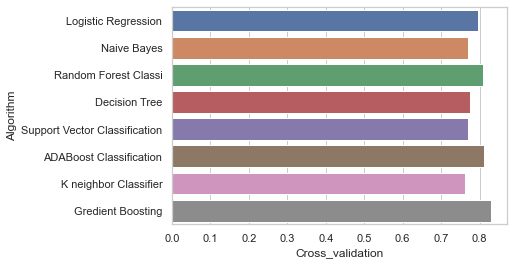

In [173]:
# Algorithm performance
sns.set(style="whitegrid")
ax = sns.barplot(y="Algorithm",x="Cross_validation",data=final_card)

In [174]:
#Based on the cross validation score we are going ahead with GBC

In [175]:
# Checking k value for cross validation
for i in range(3,15):
    
    box = []
    
    kfold = StratifiedKFold(n_splits=i,random_state=24)

    K_results = cross_val_score(mod_8,X,y,cv=kfold)

    kfold_accuracy_F = np.mean(abs(K_results))
    
    box.append(kfold_accuracy_F)
    
    print(box,i)

[0.8144166894166894] 3
[0.8301872500302994] 4
[0.8245540531962166] 5
[0.831322933671927] 6
[0.829021372328459] 7
[0.836932915057915] 8
[0.8256831352069447] 9
[0.8290474974463737] 10
[0.8302469135802468] 11
[0.8335435435435435] 12
[0.8325136074496687] 13
[0.8301445578231293] 14


In [176]:
# Best acc for k = 8
kfold = StratifiedKFold(n_splits=8,random_state=24)

K_results = cross_val_score(mod_8,X,y,cv=kfold)

kfold_accuracy_F = np.mean(abs(K_results))

In [177]:
kfold_accuracy_F

0.836932915057915

# Hyperparametric tuning

# Random Search CV

In [178]:
from sklearn.model_selection import RandomizedSearchCV

In [179]:
# random search cv parameters
loss=["deviance","exponential"]
learning_rate=[0.1,0.2,0.3,0.4,0.5]
n_estimators=[100,200,300,400,500]
subsample=[0.1,0.2,0.3,0.4,0.5]
criterion=["friedman_mse","mse", "mae"]
min_samples_split=[2,3,4,5,6]
min_samples_leaf=[1,2,3,4,5]

In [180]:
random_grid = {
"loss":loss,
"learning_rate":learning_rate,
"n_estimators":n_estimators,
"subsample":subsample,
"criterion":criterion,
"min_samples_split":min_samples_split,
"min_samples_leaf":min_samples_leaf 
}

In [181]:
print(random_grid)

{'loss': ['deviance', 'exponential'], 'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5], 'n_estimators': [100, 200, 300, 400, 500], 'subsample': [0.1, 0.2, 0.3, 0.4, 0.5], 'criterion': ['friedman_mse', 'mse', 'mae'], 'min_samples_split': [2, 3, 4, 5, 6], 'min_samples_leaf': [1, 2, 3, 4, 5]}


In [182]:
model_final = GradientBoostingClassifier()

In [183]:
random_GBC = RandomizedSearchCV(estimator=model_final,param_distributions=random_grid,scoring="accuracy",cv=5,n_jobs=1,random_state=24)                                            

In [184]:
random_GBC.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=1,
                   param_distributions={'criterion': ['friedman_mse', 'mse',
                                                      'mae'],
                                        'learning_rate': [0.1, 0.2, 0.3, 0.4,
                                                          0.5],
                                        'loss': ['deviance', 'exponential'],
                                        'min_samples_leaf': [1, 2, 3, 4, 5],
                                        'min_samples_split': [2, 3, 4, 5, 6],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500],
                                        'subsample': [0.1, 0.2, 0.3, 0.4, 0.5]},
                   random_state=24, scoring='accuracy')

In [185]:
random_GBC.best_estimator_

GradientBoostingClassifier(criterion='mae', min_samples_leaf=2,
                           min_samples_split=5, n_estimators=200,
                           subsample=0.2)

In [186]:
random_GBC.best_params_

{'subsample': 0.2,
 'n_estimators': 200,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'loss': 'deviance',
 'learning_rate': 0.1,
 'criterion': 'mae'}

In [187]:
random_GBC.best_score_

0.8208092485549132

In [208]:
predictions_Last = random_GBC.predict(X_test)

In [209]:
print(accuracy_score(y_test,predictions_Last))
print("\n")
print(confusion_matrix(y_test,predictions_Last))
print("\n")
print(classification_report(y_test,predictions_Last))
print("\n")

0.9583333333333334


[[15  0]
 [ 1  8]]


              precision    recall  f1-score   support

           0       0.94      1.00      0.97        15
           1       1.00      0.89      0.94         9

    accuracy                           0.96        24
   macro avg       0.97      0.94      0.95        24
weighted avg       0.96      0.96      0.96        24





# ROC AUC Curve

In [210]:
from sklearn.metrics import roc_curve,roc_auc_score

In [211]:
y_pred_prob = random_GBC.predict_proba(X_test)[:,1]

In [212]:
fpr,tpr,thresholds = roc_curve(y_test,y_pred_prob)

In [213]:
fpr

array([0.        , 0.        , 0.        , 0.2       , 0.66666667,
       0.8       , 1.        ])

In [214]:
tpr

array([0.        , 0.11111111, 0.88888889, 0.88888889, 1.        ,
       1.        , 1.        ])

In [215]:
thresholds

array([1.99961451, 0.99961451, 0.6427159 , 0.1228314 , 0.1065423 ,
       0.10242966, 0.06092062])

Text(0.5, 1.0, 'Gredient Boosting Algorithm')

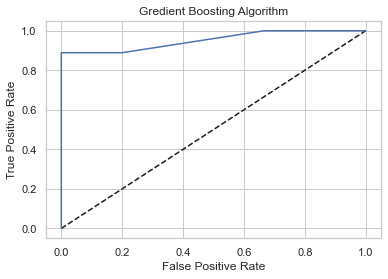

In [216]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label="Gredient Boost")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Gredient Boosting Algorithm')

# Saving the model using Pickle

In [217]:
import pickle

In [198]:
with open("model_pickle","wb") as f:
    
    pickle.dump(random_GBC,f)

In [199]:
with open("model_pickle","rb") as f:
    
    titan = pickle.load(f)

# Conclusion

In [200]:
# Using the model to predict a single value

In [201]:
# The model needs to predict 1 i.e the person survived 
# for this inputs
df.iloc[1,0:].values

array([ 1.        ,  1.        , 38.        ,  1.        ,  0.        ,
        4.28059312,  0.        ,  0.        ,  0.        ])

In [202]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,2.110213,1,0,1
1,1,1,38.0,1,0,4.280593,0,0,0
2,1,3,26.0,0,0,2.188856,0,0,1
3,1,1,35.0,1,0,3.990834,0,0,1
4,0,3,35.0,0,0,2.202765,1,0,1


In [203]:
# Predicting results
titan.predict(minni.transform([[1.,38.,1.,0.,4.28059312,0.,0.,0.]]))

array([1], dtype=int64)

In [204]:
# The model predicted right for this individual value

In [205]:
cm = confusion_matrix(y_test,predictions_Last)

<AxesSubplot:>

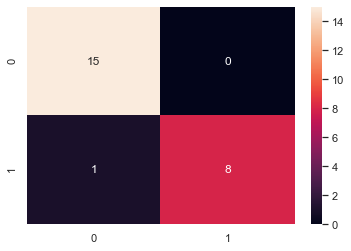

In [206]:
sns.heatmap(data=cm,annot=True)

In [207]:
# Comparing predicted value vs actual value
print(np.concatenate((predictions_Last.reshape(len(predictions_Last),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]]


# Most of the predictions are right